# EN 2550 - Fundamentals of Image Processing and Machine Vision
## Assignment 01
## 180616T P.M.P.H. Somarathne

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
%matplotlib inline

## Question 01
Running point operations and spatial filtering operations on an image

Choosen image: sigiriya.jpg in grayscale

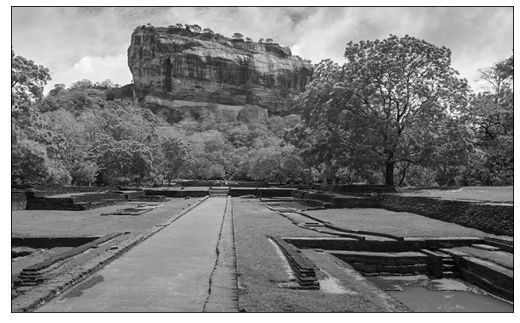

In [16]:
image = cv.imread('a01images/sigiriya.jpg',cv.IMREAD_GRAYSCALE)

cv.imwrite('Outputs/sigiriya_gray.png',image)

fig,ax = plt.subplots(figsize=(9,6))
ax.imshow(image,cmap='gray',vmin=0,vmax=255)
ax.set_xticks([]), ax.set_yticks([])
plt.show()

### (a) Histogram Computation

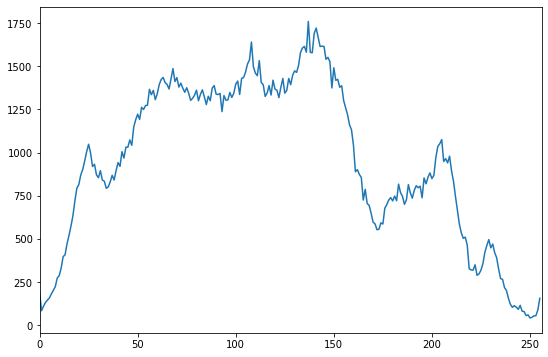

In [4]:
hist = cv.calcHist([image],[0],None,[256],[0,256])

fig,ax = plt.subplots(figsize=(9,6))
ax.plot(hist)
plt.xlim([0,256])
plt.savefig('Outputs/Histogram.png')
plt.show()

### (b) Histogram Equalization

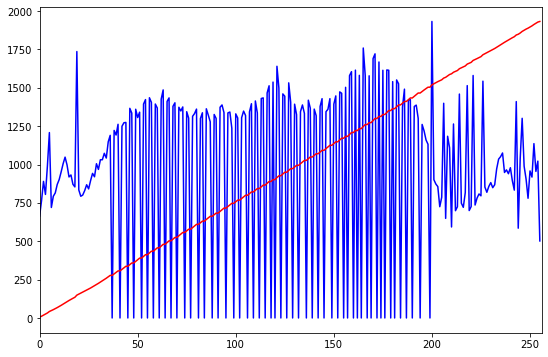

In [7]:
equ_image = cv.equalizeHist(image)

equ_hist = cv.calcHist([equ_image],[0],None,[256],[0,256])
equ_hist_cumm = equ_hist.cumsum()
equ_hist_cumm_normalized = equ_hist_cumm * equ_hist.max() / equ_hist_cumm.max()

cv.imwrite('Outputs/Equalized_Image.png',equ_image)

fig,ax = plt.subplots(figsize=(9,6))
ax.plot(equ_hist,'b')
ax.plot(equ_hist_cumm_normalized,'r')
plt.xlim([0,256])
plt.savefig('Outputs/Equalized_Histogram.png')
plt.show()

### (c) Intensity Transformations

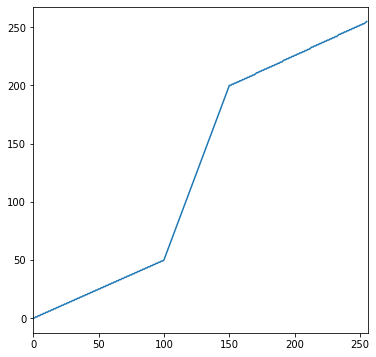

In [9]:
x1,y1 = (100,50)
x2,y2 = (150,200)
transform = np.concatenate([np.floor((y1-0)*np.arange(0,x1)/(x1-0)),\
                            np.floor((y2-y1)*np.arange(0,x2-x1)/(x2-x1)+y1),\
                            np.floor((255-y2)*np.arange(0,256-x2)/(255-x2)+y2)]).astype(np.uint8)

trans_image = transform[image]

cv.imwrite('Outputs/Intensity_Image.png',trans_image)

fig,ax = plt.subplots(figsize=(6,6))
ax.plot(transform)
plt.xlim([0,256])
plt.savefig('Outputs/Intensity_Transform.png')
plt.show()

### (d) Gamma Correction

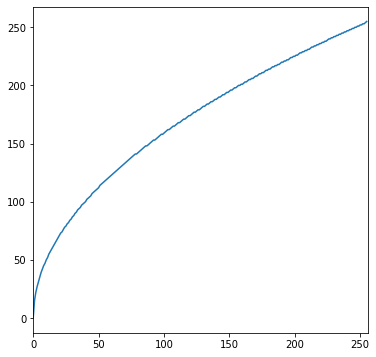

In [393]:
gamma = 0.5
gamma_table = np.array([(i/255.0)**(gamma)*255.0 for i in np.arange(0,256)]).astype('uint8')

gamma_image = gamma_table[image]

cv.imwrite('Outputs/Gamma_Image.png',gamma_image)

fig,ax = plt.subplots(figsize=(6,6))
ax.plot(gamma_table)
plt.xlim([0,256])
plt.savefig('Outputs/Gamma_correction.png')
plt.show()

### (e) Gaussian smoothing

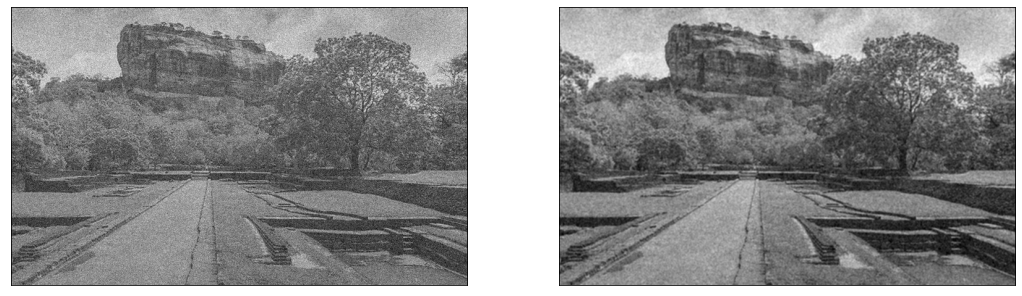

In [12]:
# Generate Gaussian noise
mean = 0
sigma = 0.1
noise = np.random.normal(mean,sigma,image.shape)*255 # Adjusted to [0,255] range

# Add the noise to the image
noisy_image = cv.add(image.astype(np.float),noise)
noisy_image = cv.normalize(noisy_image, None, 0, 255, cv.NORM_MINMAX).astype(np.uint8)

# Filter the image
kernel_size = 3
filter_sigma = 1
gaussian_kernel = cv.getGaussianKernel(kernel_size, filter_sigma)
filtered_image = cv.sepFilter2D(noisy_image, -1, gaussian_kernel, gaussian_kernel)

cv.imwrite('Outputs/Noisy_Image.png',noisy_image)
cv.imwrite('Outputs/Gauss_filt_Image.png',filtered_image)

fig,ax = plt.subplots(1,2,figsize=(18,6))
ax[0].imshow(noisy_image,cmap='gray')
ax[0].set_xticks([]), ax[0].set_yticks([])
ax[1].imshow(filtered_image,cmap='gray')
ax[1].set_xticks([]), ax[1].set_yticks([])
plt.show()

### (f) Unsharp Masking

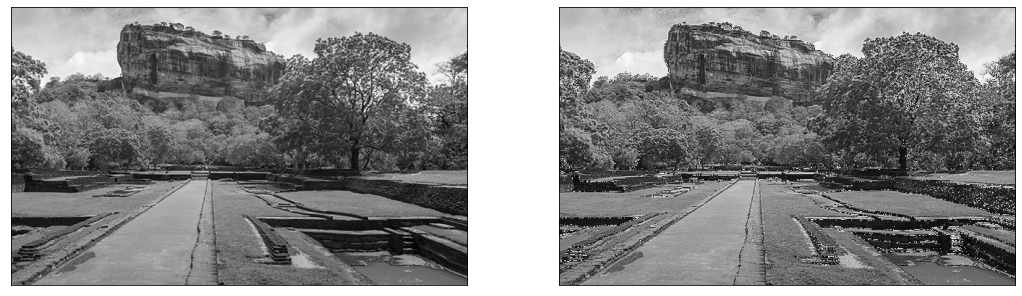

In [13]:
# Generating the blurred image
blur_size = 5
blur_sigma = 1
blur_kernel = cv.getGaussianKernel(blur_size, blur_sigma)
blurred_image = cv.sepFilter2D(image, -1, blur_kernel, blur_kernel, anchor=(-1,-1), delta=0, borderType=cv.BORDER_REPLICATE)

# Taking the difference image
difference_image = image.astype(np.float32) - blurred_image.astype(np.float32)

# Getting the sharpened image
alpha = 0.7
sharpened_image = cv.addWeighted(image.astype(np.float32), 1.0, difference_image, alpha, 0).astype(np.uint8)

cv.imwrite('Outputs/Unsharp_Image.png',sharpened_image)

fig,ax = plt.subplots(1,2,figsize=(18,6))
ax[0].imshow(image,cmap='gray')
ax[0].set_xticks([]), ax[0].set_yticks([])
ax[1].imshow(sharpened_image,cmap='gray')
ax[1].set_xticks([]), ax[1].set_yticks([])
plt.show()

### (g) Median Filtering

In [11]:
# Apply salt and pepper noise
salt_image = np.copy(image)
s_vs_p = 0.5
amount = 0.1
num_salt = np.ceil(amount * salt_image.size * s_vs_p)
coords = [np.random.randint(0, i-1, int(num_salt)) for i in salt_image.shape]
salt_image[coords] = 255
num_pepper = np.ceil(amount * salt_image.size * s_vs_p)
coords = [np.random.randint(0, i-1, int(num_pepper)) for i in salt_image.shape]
salt_image[coords] = 0

# Filter the image
median_filter_size = 3
median_filtered_image = cv.medianBlur(salt_image,median_filter_size)

cv.imwrite('Outputs/Salt_Image.png',salt_image)
cv.imwrite('Outputs/Median_filt_Image.png',median_filtered_image)

fig,ax = plt.subplots(1,2,figsize=(20,10))
ax[0].imshow(salt_image,cmap='gray')
ax[0].set_xticks([]), ax[0].set_yticks([])
ax[1].imshow(median_filtered_image, cmap='gray')
ax[1].set_xticks([]), ax[1].set_yticks([])
plt.show()

NameError: name 'image' is not defined

### (h) Bilateral Filtering

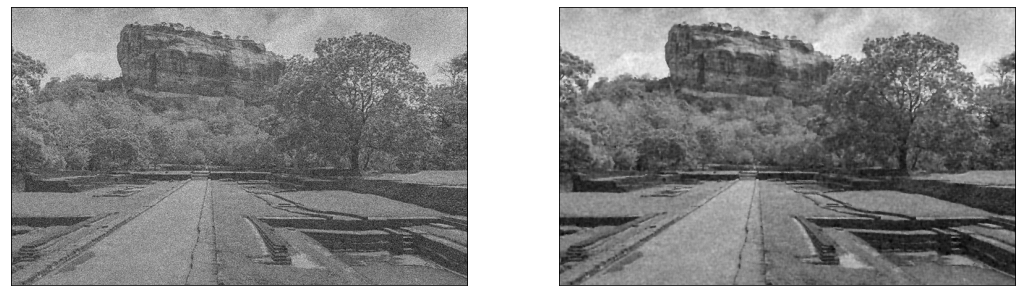

In [15]:
bilateral_filter_size = 5
bilateral_sigma = 50
bilateral_filtered_image = cv.bilateralFilter(noisy_image, bilateral_filter_size, bilateral_sigma, bilateral_sigma)

cv.imwrite('Outputs/Bilateral_Image.png',bilateral_filtered_image)

fig,ax = plt.subplots(1,2,figsize=(18,6))
ax[0].imshow(noisy_image,cmap='gray')
ax[0].set_xticks([]), ax[0].set_yticks([])
ax[1].imshow(bilateral_filtered_image,cmap='gray')
ax[1].set_xticks([]), ax[1].set_yticks([])
plt.show()

## Question 02
Counting the rice grains in the rice image

Expected answer: 101

Number of rice grains = 100


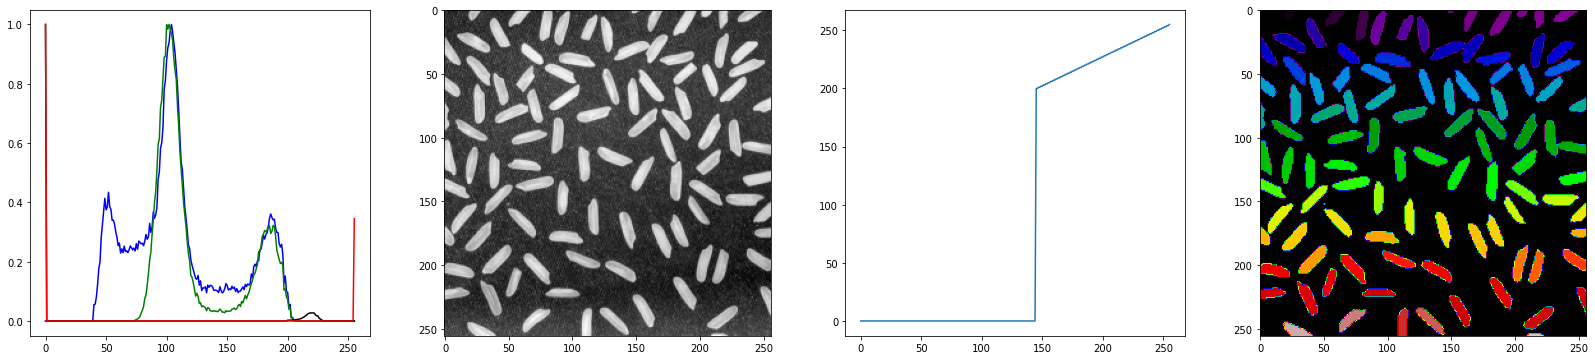

In [679]:
x1 = 145
y1 = 200
transform1 = np.concatenate([np.zeros((x1)),np.floor((255-y1)*np.arange(0,256-x1)/(255-x1)+y1)]).astype(np.uint8)

transform2 = np.zeros((256)).astype(np.uint8)
transform2[205:] = 255

rice_image = cv.imread('a01images/rice.png', cv.IMREAD_GRAYSCALE)

hist1 = cv.calcHist([rice_image],[0],None,[256],[0,256])
hist1 = hist1/hist1.max()

for x in np.arange(96,256):
    rice_image[x,:]+=(((x-96)**2)/400).astype(np.uint8)

hist2 = cv.calcHist([rice_image],[0],None,[256],[0,256])
hist2 = hist2/hist2.max()

enhanced = transform1[rice_image]
hist3 = cv.calcHist([enhanced],[0],None,[256],[0,256])
hist3 = hist3/hist3.max()

enhanced = transform2[enhanced]

hist4 = cv.calcHist([enhanced],[0],None,[256],[0,256])
hist4 = hist4/hist4.max()

num_labels,labels = cv.connectedComponents(enhanced, connectivity = 4)
print("Number of rice grains =", num_labels-1)

fig,ax = plt.subplots(1,4,figsize=(28,6))
ax[0].plot(hist1,'b')
ax[0].plot(hist2,'g')
ax[0].plot(hist3,'k')
ax[0].plot(hist4,'r')
ax[1].imshow(rice_image, cmap = 'gray')
ax[2].plot(transform1)
ax[3].imshow(labels, cmap = 'nipy_spectral')
plt.show()

Number of rice grains = 101


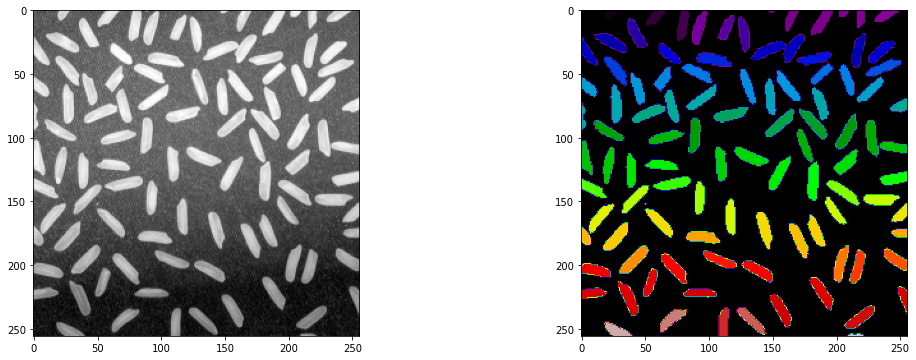

In [5]:
rice_image = cv.imread('a01images/rice.png', cv.IMREAD_GRAYSCALE)

enhanced = cv.adaptiveThreshold(rice_image, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 61, -30)
num_labels,labels = cv.connectedComponents(enhanced, connectivity = 4)
print("Number of rice grains =", num_labels-1)

fig,ax = plt.subplots(1,2,figsize=(18,6))
ax[0].imshow(rice_image, cmap = 'gray')
ax[1].imshow(labels, cmap = 'nipy_spectral')
plt.show()

## Question 03
Image zooming using nearest-neighbor and bilinear interpolation

In [18]:
def nnzoom(image, scale):
    """ Image zooming using nearest-neighbours interpolation """
    if (scale<=0 or scale>10): print("Cannot process the scale value")
    else:
        scaled_width = int(image.shape[0]*scale)
        scaled_height = int(image.shape[1]*scale)
        if len(image.shape)==3: scaled_image = np.zeros((scaled_width,scaled_height,3),dtype=np.uint8)
        else: scaled_image = np.zeros((scaled_width,scaled_height),dtype=np.uint8)
        for x in np.arange(scaled_width):
            for y in np.arange(scaled_height):
                x_0,y_0 = int(x/scale),int(y/scale)
                scaled_image[x,y] = image[x_0,y_0]
        return scaled_image

def bizoom(image, scale):
    """ Image zooming using bilinear interpolation """
    if (scale<=0 or scale>10): print("Cannot process the scale value")
    else:
        scaled_width = np.floor(image.shape[0]*scale).astype(np.int32)
        scaled_height = np.floor(image.shape[1]*scale).astype(np.int32)
        if len(image.shape)==3: scaled_image = np.zeros((scaled_width,scaled_height,3),dtype=np.uint8)
        else: scaled_image = np.zeros((scaled_width,scaled_height),dtype=np.uint8)
        for x in np.arange(scaled_width):
            for y in np.arange(scaled_height):
                x_i,y_i = x/scale,y/scale
                x_0,y_0 = int(x_i),int(y_i)
                if (x_i==x_0 and y_i==y_0): scaled_image[x,y] = image[x_0,y_0]
                else:
                    h00=
        return scaled_image

def ssd(image1, image2):
    diff = image1.astype(np.int64)-image2.astype(np.int64)
    if len(image1.shape)==3: return 100*np.sum(np.multiply(diff,diff))/(image1.shape[0]*image1.shape[1]*255*255*3)
    return 100*np.sum(np.multiply(diff,diff))/(image1.shape[0]*image1.shape[1]*255*255)

def zoom(func, scale):
    for i in ["06"]:#"01","02","04","05","06","07"]:
        small_image = cv.imread("a01images/im"+i+"small.png", cv.IMREAD_GRAYSCALE)
        large_image = cv.imread("a01images/im"+i+".png", cv.IMREAD_GRAYSCALE)
        scaled_image = func(small_image, scale)
        cv.imwrite("Outputs/nnzoom"+i+".jpg",scaled_image)
        print("SSD for image",i,"=",np.round(ssd(scaled_image,large_image),3),"%\n")


In [19]:
zoom(bizoom,4)

SSD for image 06 = 0.462 %



In [20]:
zoom(nnzoom,4)

SSD for image 06 = 0.298 %



In [21]:
ori = cv.imread('a01images/im06.png',cv.IMREAD_COLOR)
zoomed = cv.imread('Outputs\zoomed_pic.jpg')

In [22]:
ori.shape

(1080, 1920, 3)

In [23]:
zoomed.shape

AttributeError: 'NoneType' object has no attribute 'shape'